In [1]:
import pandas as pd


df = pd.read_csv('heart-failure.csv')

df.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [2]:
df['Sex'] = df['Sex'].map({'M': 1, 'F': 0})
df['ExerciseAngina'] = df['ExerciseAngina'].map({'Y': 1, 'N': 0})
df['ST_Slope'] = df['ST_Slope'].map({'Up': 0,'Flat': 1, 'Down': 2})
df['RestingECG'] = df['RestingECG'].map({'Normal': 0,'ST': 1, 'LVH': 2})
df['ChestPainType'] = df['ChestPainType'].map({'ATA': 0, 'NAP': 1, 'ASY': 2, 'TA':3})

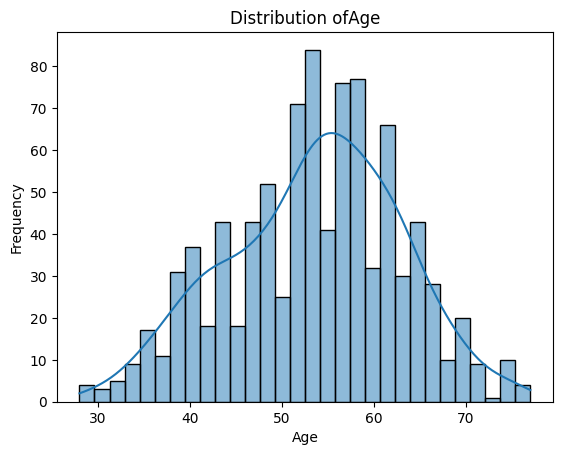

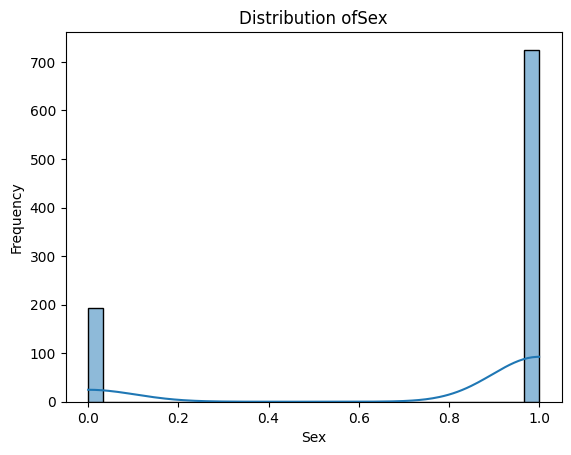

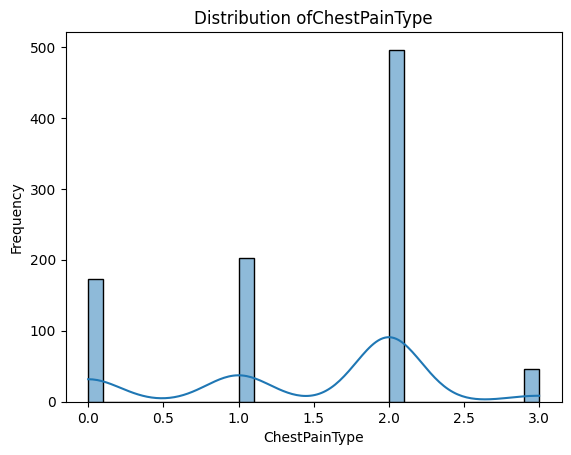

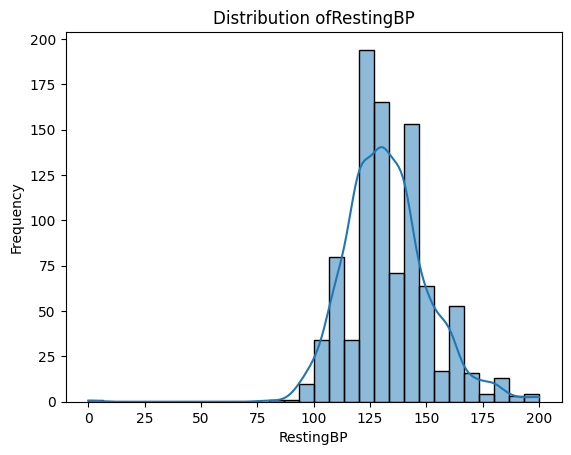

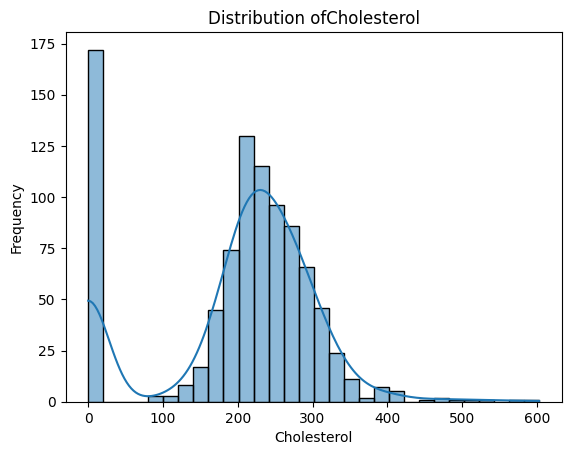

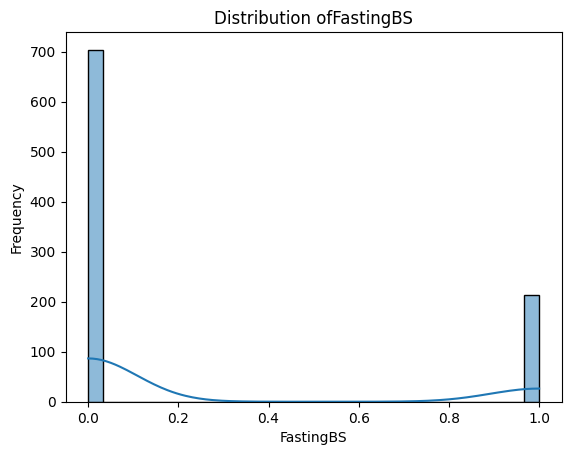

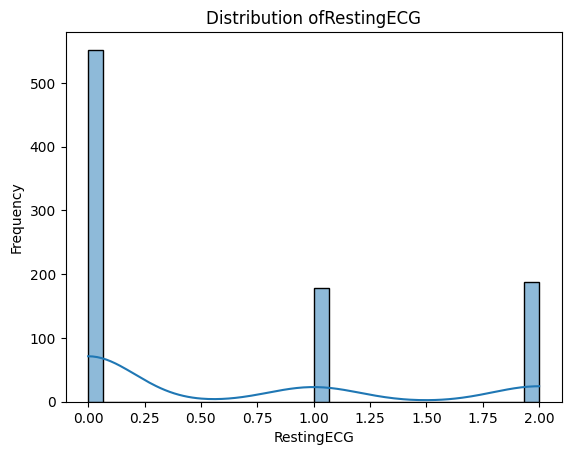

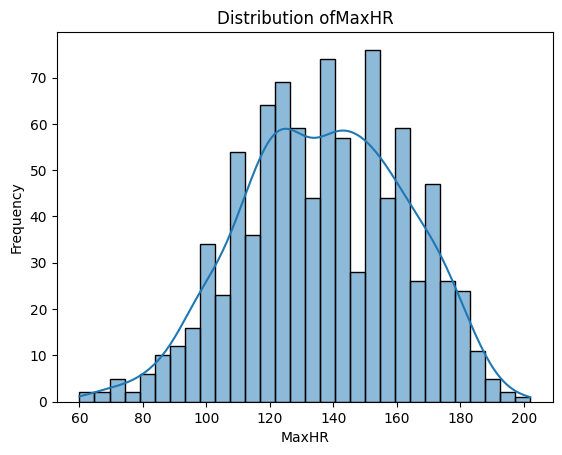

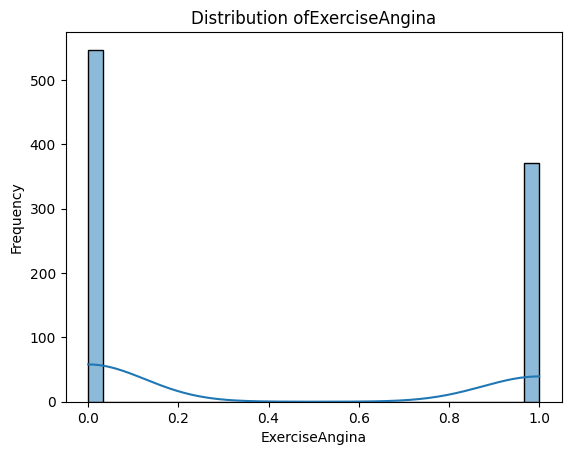

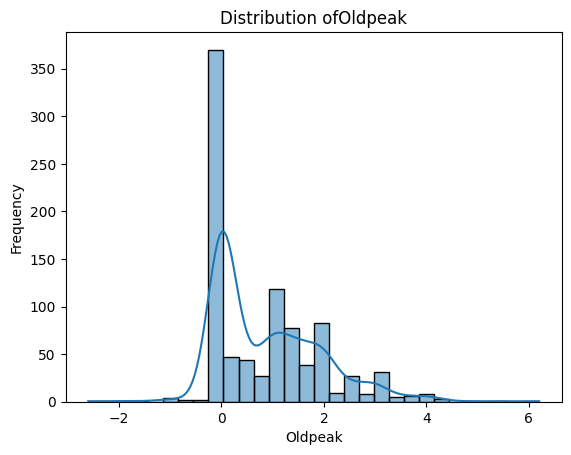

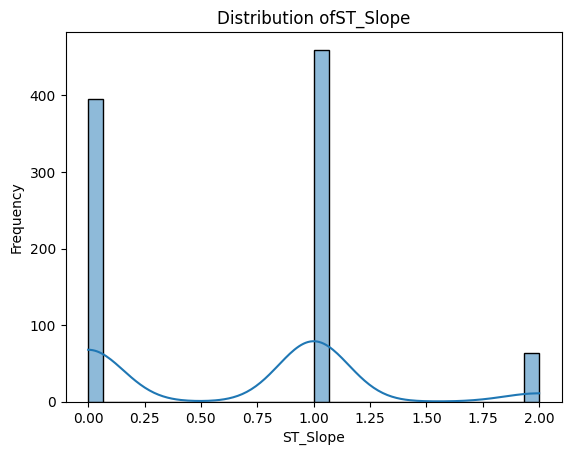

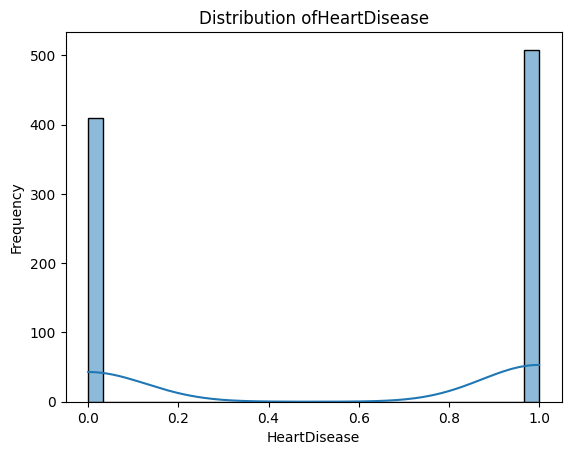

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

for column in df.columns:
  sns.histplot(df[column], bins=30, kde=True)
  plt.xlabel(column)
  plt.ylabel('Frequency')
  plt.title('Distribution of' + column)
  plt.show()


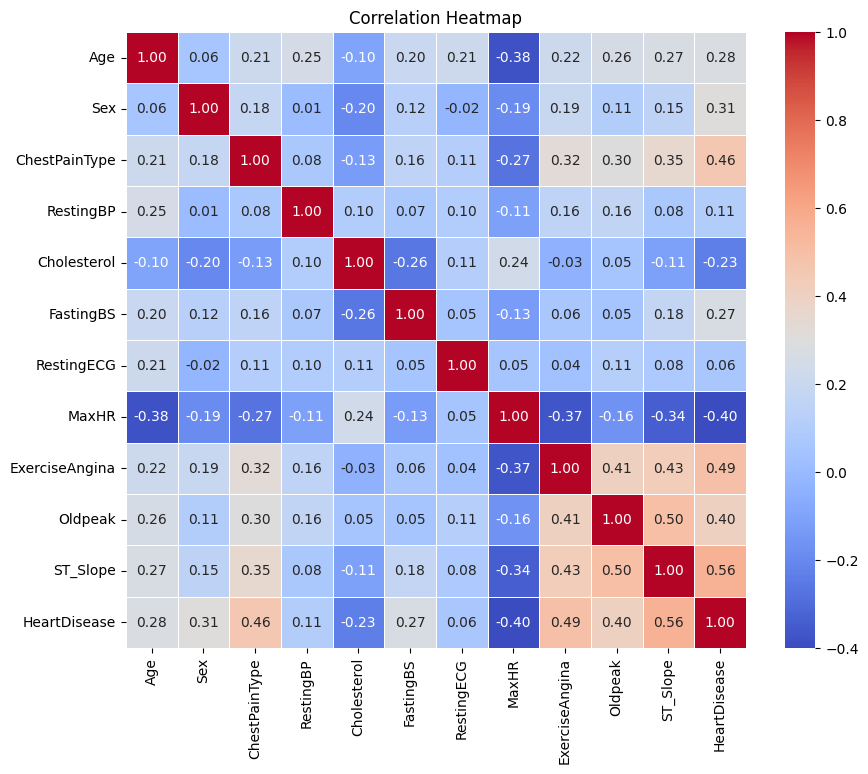

In [4]:
correlation= df.corr()
plt.figure(figsize=(10, 8))

sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Correlation Heatmap')
plt.show()

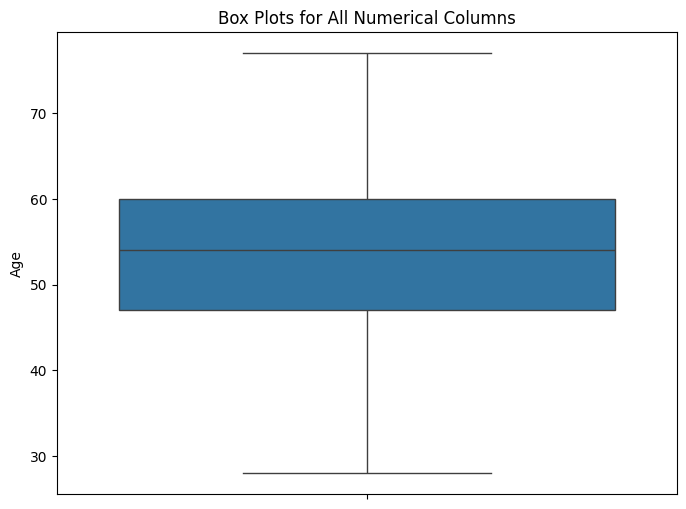

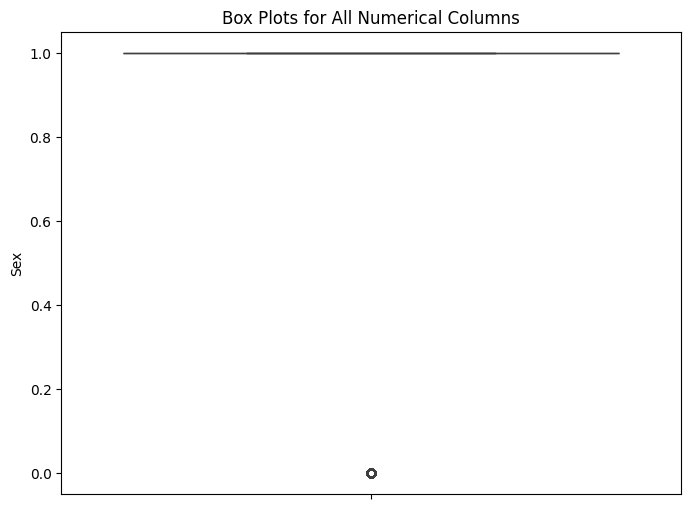

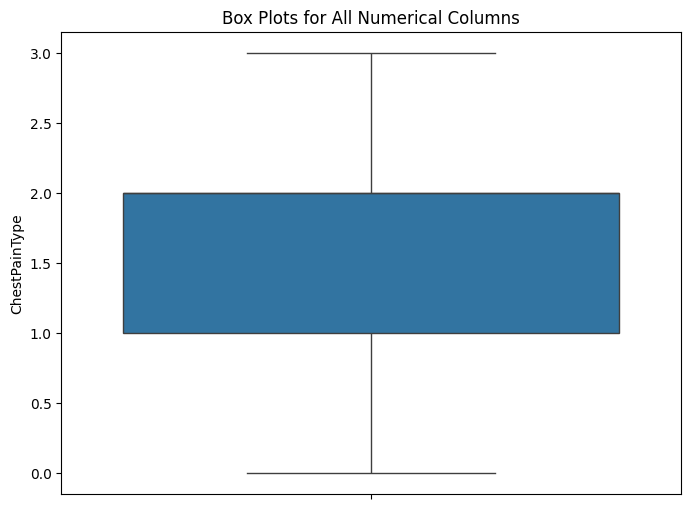

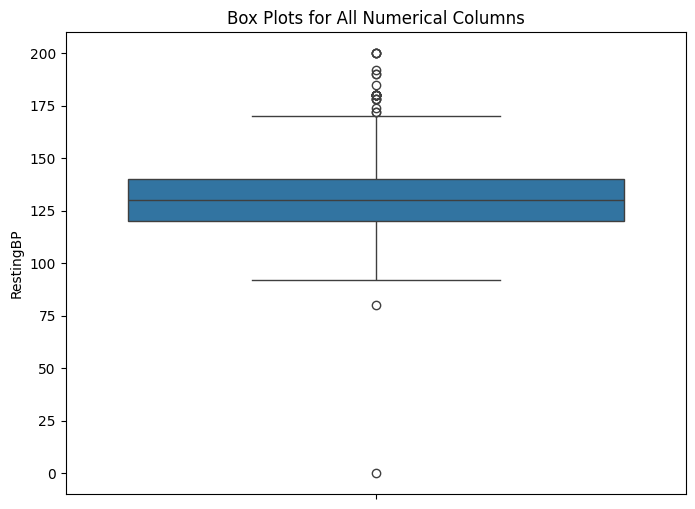

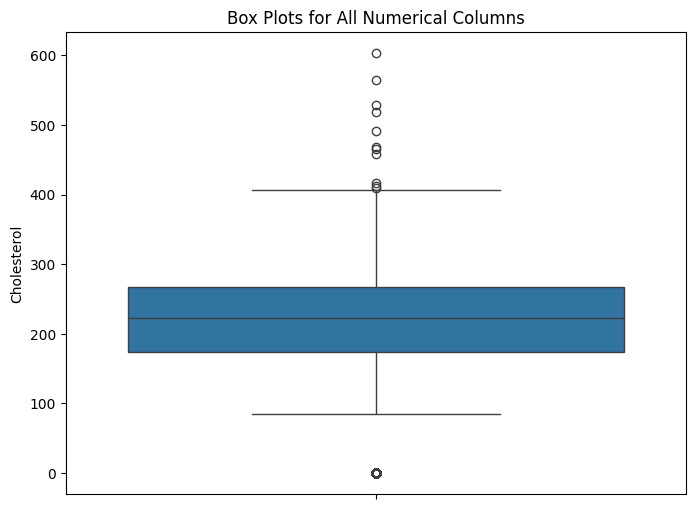

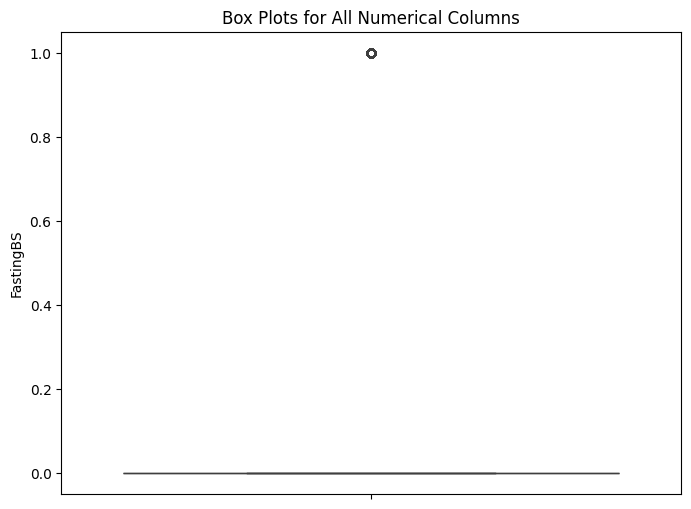

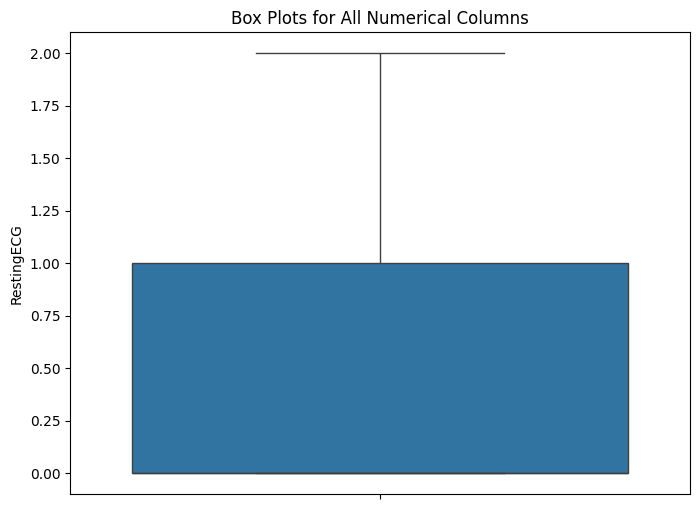

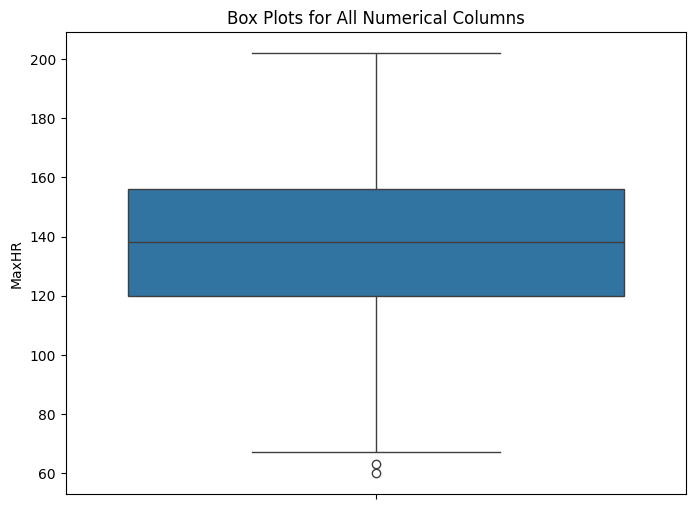

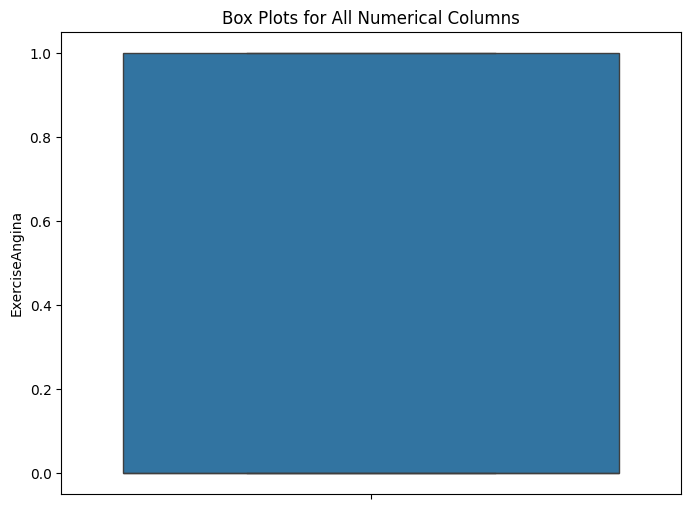

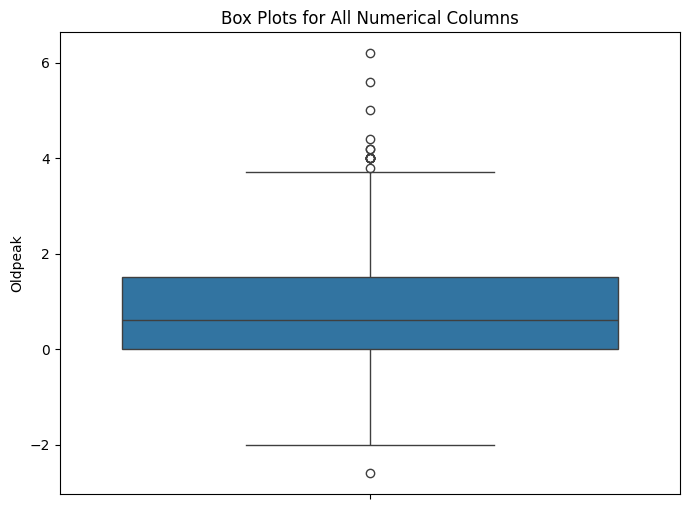

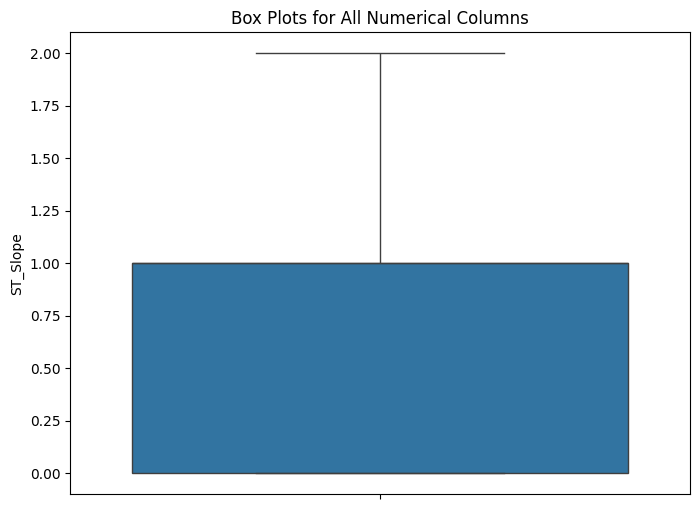

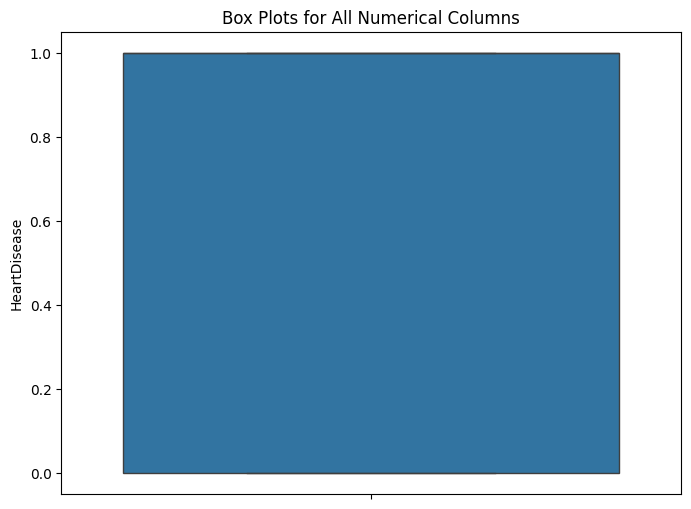

In [5]:
for column in df.columns:
  plt.figure(figsize=(8, 6))
  sns.boxplot(data=df[column])
  plt.title('Box Plots for All Numerical Columns')
  plt.xticks(rotation=90)
  plt.show()

# definindo o melhor valor de K para kmeans

In [27]:
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score

ImportError: cannot import name 'KMedoid' from 'sklearn_extra.cluster' (/home/gabriel/.local/lib/python3.10/site-packages/sklearn_extra/cluster/__init__.py)

In [7]:

df_km = df[sorted(df.columns)]

df_km = df_km.drop('HeartDisease', axis=1)


In [8]:
wcss = []
sil = []
cb = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters= i ,random_state=42)
    kmeans.fit(df_km)
    labels = kmeans.labels_
    wcss.append(kmeans.inertia_)
    sil.append(silhouette_score(df_km, labels, metric = 'euclidean')) if i!=1 else sil.append(0)
                                                                                              
    cb.append(calinski_harabasz_score(df_km, labels))  if i!=1 else cb.append(0)

In [9]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
scaler = MinMaxScaler(feature_range=(0, 1))

wcss = scaler.fit_transform( np.array(wcss).reshape(-1,1))
cb = scaler.fit_transform(np.array(cb).reshape(-1,1))
sil = scaler.fit_transform(np.array(sil).reshape(-1,1))

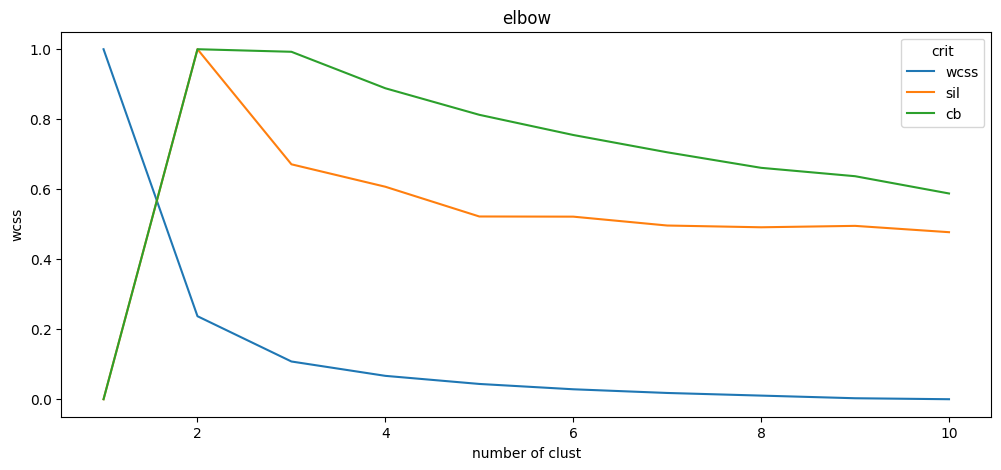

In [10]:

plt.figure(figsize=(12,5))
plt.plot(range(1,11), wcss, label="wcss")
plt.plot(range(1,11), sil, label="sil")
plt.plot(range(1,11), cb , label="cb")
plt.legend(title = "crit") 
plt.title('elbow')
plt.xlabel('number of clust')
plt.ylabel('wcss')
plt.show()

wcss pode ser 3 ou 4. Baseado no metodo da silhoeta que mede o qual proximos são os pontos intra cluster e calinski harabaz que mede o qual coesos entre si são os pontos em comparação com o quão  não coesos interclusteres são.

In [21]:
heart_disease_kmeans = KMeans(n_clusters= 2 ,random_state=45)
heart_disease_kmeans.fit(df_km)

KMeans(n_clusters=2, random_state=45)

## o cluster e correlação com diagnostico

In [22]:
df_km['cluster'] = heart_disease_kmeans.predict(df_km)
df_km['HeartDisease'] = df['HeartDisease']


In [23]:
# Check if indices are the same
if df.index.equals(df_km.index):
    df_km['HeartDisease'] = df['HeartDisease']
else:
    print("The DataFrames are not aligned!")


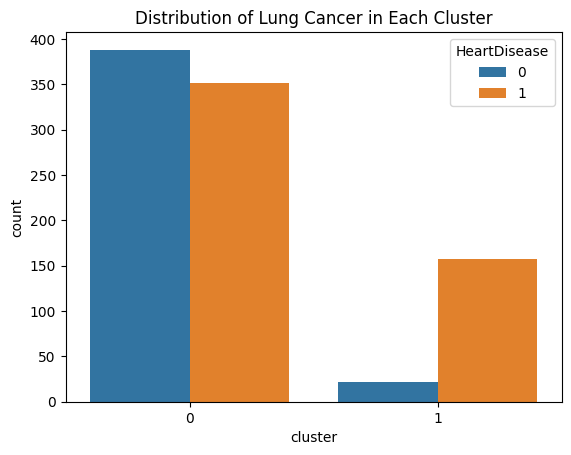

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='cluster', hue='HeartDisease', data=df_km)
plt.title('Distribution of Lung Cancer in Each Cluster')
plt.show()


In [15]:
pd.crosstab(df_km['cluster'], df_km['HeartDisease'])


HeartDisease,0,1
cluster,,
0,22,158
1,388,350


In [16]:
df_km.groupby('cluster')['HeartDisease'].agg(['count', 'mean'])


,count,mean
cluster,,
0,180,0.877778
1,738,0.474255
